## Mix up OpenCV and Jupyter (iPython Notebook)

The purpose of this post is to show how to plot images acquired with opencv rather than matplotlib. Just in case. <br> First of all, set matplotlib inline and import the necessary stuff.

### LaTex:
https://wch.github.io/latexsheet/latexsheet.pdf

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time as t
#import sys
%matplotlib inline
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.2 


(804, 1550, 3)


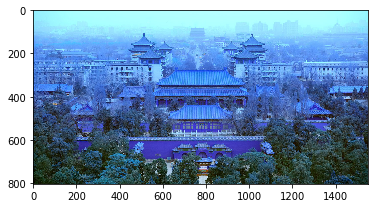

In [4]:
#read image in a mat.
im = cv2.imread('china.jpg')
h,w = im.shape[:2]
print(im.shape)
plt.imshow(im)
#plt.imshow(im,cmap='gray')
plt.show()

The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR. 
<br>Matplotlib's plot expects an RGB image so, for a correct display of the image, it is necessary to swap those channels. 
<br>This operation can be done either by using openCV conversion functions cv2.cvtColor() or by working directly with the numpy array.

#### cvtColor
  cvtColor is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [6]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
print (BGRflags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12', 'COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY', 'COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR', 'COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB', 'COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555', 'COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB', 'COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV', 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is **cv2.COLOR_BGR2RGB**



In [9]:
t0 = t.time()
cv_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
t1 = t.time()
dt_cv = t1-t0
print ("Conversion took %0.5f seconds" % dt_cv)

Conversion took 0.00566 seconds


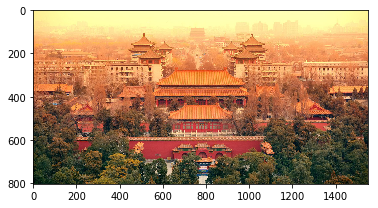

In [10]:
plt.imshow(cv_rgb)
plt.show()

### Numpy Swap
Let's take a look at how openCV loads images.


In [11]:
print ("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % im.shape)

Height:		804 pixels
Width:		1550 pixels
Channels:	3


In [14]:
print ("pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(im[0,0,:]))
print ("data-type: %s " % im.dtype)

pixel at (0,0) [B,G,R]:	[147,237,254]
data-type: uint8 


This means that each image is loaded as a multidimensional array in which each element represents a pixel as a triple of 8-bit unsigned integers. Each integer is the value of blue, green and red of each pixel. In order to display the image correctly, the blue and red channels must be swapped.

In [16]:
np_rgb = np.zeros_like(im)
t0 = t.time()
np_rgb[:,:,0] = im[:,:,2]
np_rgb[:,:,1] = im[:,:,1]
np_rgb[:,:,2] = im[:,:,0]
t1 = t.time()
dt_np = t1-t0

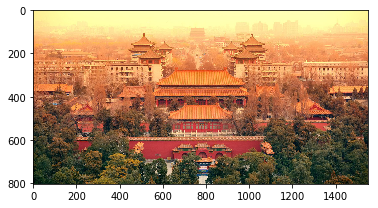

Conversion took 0.00438 seconds


In [18]:
plt.imshow(np_rgb)
plt.show()
print ("Conversion took %0.5f seconds" % dt_np)